In [1]:
import numpy as np
import pandas as pd
import matplotlib
print matplotlib.__version__
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import seaborn as sns
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
from random import shuffle
import unit_convert
import GammaRay as gr
%matplotlib inline

twopi=2.*np.pi
yearsc=3.1557*10**7
figsave='/projects/b1095/syr904/projects/GammaRay/'
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

1.5.1


[8.5339351013274134e+33, 3.5284456126868464e+33, 3.1960676746218588e+35, 1.6129356408206131e+35, 3.5610096222393663e+35, 0, 8.5964861159763125e+34, 1.4836016451266257e+34, 9.7825169763219443e+34, 0, 1.2276278462657292e+34, 2.5869763044100107e+35, 0, 6.6611187951056821e+33, 0, 6.5664500043853497e+33, 3.4043257250039304e+33, 5.6232532675172764e+33, 9.5222678575775182e+35, 0, 1.4097295719766339e+34, 2.7454575005363075e+34, 3.8262254876377143e+35, 0, 1.6491096971162662e+34, 5.1774357871682136e+33, 1.0657162486947993e+34, 0, 1.1948009523084961e+34, 0, 4.2481097350944641e+33, 5.1014555662264166e+33, 0, 0, 0, 0, 3.373868390354488e+29, 0, 2.1695998790780253e+35, 0, 3.4412825624862042e+33, 1.0931152675017897e+34, 1.2019356789884236e+34, 0, 0, 0, 6.3961398749075723e+33, 1.8554784895886596e+35, 1.753240501584614e+35, 6.4641345940739514e+35, 0, 4.9781180949178023e+33, 1.1430153186254947e+35, 0, 0, 7.3701212624370425e+33, 6.0461738503789363e+34, 0, 1.1536608137782367e+35, 7.3404800066001989e+35, 0,

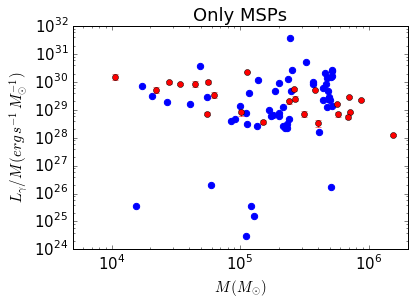

In [3]:
##Plot L_gamma vs. Total mass of the  GCs
L_gamma, M=gr.find_Lgammaray_lastsnapshot('/projects/b1095/syr904/projects/GammaRay/', 0.2)

Lgamma_obs=np.genfromtxt('/projects/b1095/syr904/projects/GammaRay/lgamma.txt')
mass_obs=np.array(Lgamma_obs[:,0]); lgamma_obs=np.array(Lgamma_obs[:,1])
lgamma_obs_max=np.array(Lgamma_obs[:,2]); lgamma_obs_min=np.array(Lgamma_obs[:,3])
lgamma_lowerr=lgamma_obs-lgamma_obs_min; lgamma_uperr=lgamma_obs_max-lgamma_obs
lgamma_error=[lgamma_lowerr, lgamma_uperr]

print L_gamma
print len(L_gamma)

index=[]
for i in range(len(L_gamma)):
    if L_gamma[i]==0.:
        index.append(i)
    if L_gamma[i]/M[i]<=10**28 and L_gamma[i]/M[i]>0:
        print i
        #index.append(i)
        
        
L_gamma = [x for y, x in enumerate(L_gamma) if y not in index]
M = [m for n, m in enumerate(M) if n not in index]
L_gamma=np.array(L_gamma); M=np.array(M)

#Lzero=np.where(L_gamma==0)[0]
#L_gamma=np.delete(L_gamma, Lzero); M=np.delete(M, Lzero)
#print L_gamma, M#, Lzero

matplotlib.rcParams.update({'font.size': 15})

plt.figure()
plt.scatter(M, L_gamma/M, color='b', s=40)
plt.errorbar(mass_obs, lgamma_obs, yerr=lgamma_error, fmt='o', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5*10**3, 2*10**6)
plt.xlabel(r'$M\,(M_{\odot})$')
plt.ylabel(r'$L_{\gamma}/M\,(erg\,s^{-1}\,M_{\odot}^{-1})$')
plt.title('Only MSPs')

#plt.savefig(figsave+'Gamma_M_msp.pdf', dpi=300)

In [ ]:
##Plot characteristic age of pulsars

###Model Data###
datamsp=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/msps_last.dat')
datapsr=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/normalpsr_last.dat')

B=np.array(datamsp[:,4]); P=np.array(datamsp[:,5])
Bpsr=np.array(datapsr[:,4]); Ppsr=np.array(datapsr[:,5])

Pdot=Kconst*yearsc*B*B/P
Pdotpsr=Kconst*yearsc*Bpsr*Bpsr/Ppsr

Ptot=np.concatenate((P, Ppsr), axis=0)
Pdottot=np.concatenate((Pdot, Pdotpsr), axis=0)

tau=0.5*Ptot/Pdottot
tau=tau/yearsc/10**9
taumsp=0.5*P/Pdot
taumsp=taumsp/yearsc/10**9
taupsr=0.5*Ppsr/Pdotpsr
taupsr=taupsr/yearsc/10**9

weights = np.ones_like(tau)/float(len(tau))

matplotlib.rcParams.update({'font.size': 16})
plt.figure()
#plt.hist(tau, bins=np.logspace(np.log10(min(tau)), np.log10(max(tau)), 20), alpha=0.7)
plt.hist(taumsp, bins=np.logspace(np.log10(min(taumsp)), np.log10(max(taumsp)), 20), histtype='stepfilled', alpha=0.7, label='MSP')
plt.hist(taupsr, bins=np.logspace(np.log10(min(taupsr)), np.log10(max(taupsr)), 25), histtype='stepfilled', alpha=0.7, label='Slow PSR')
plt.xscale('log')
plt.legend(loc='upper left')
plt.xlabel(r'$\tau\,(Gyr)$')

In [ ]:
##Plot the distribution of formation time of MSPs
historyfiles=np.sort(glob('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/MSPBHinGC/data/history/MSP/*'))

ft=[]
for i in range(len(historyfiles)):
    with open(historyfiles[i], 'r') as fhist:
        next(fhist)
        for line in fhist:
            datahist=line.split()
            if int(datahist[8])==13 and float(datahist[2])<=0.03:
                ft.append(float(datahist[0])/1000.)
                break
            
plt.figure()
plt.hist(ft, bins=10, alpha=0.7)
plt.xlabel('Formation Time (Gyr)')
plt.ylabel('N')

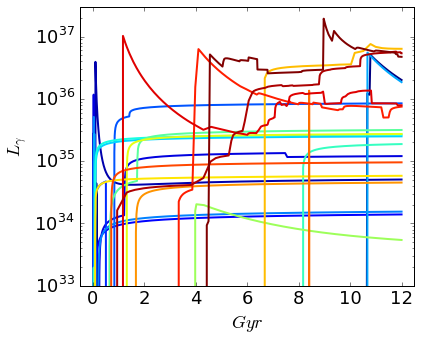

In [15]:
##Cumulative distribution of Gamma-ray luminosity vs. time
#Lgammafile=np.sort(glob('/projects/b1095/syr904/projects/PULSAR/kickgrid_runs/MSPBHinGC/data/Lgamma/*'))


matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [6, 5]
c = cm.jet(np.linspace(0, 1, 25))

plt.figure()
for i in range(len(Lgammafile)):
    datagamma=np.genfromtxt(Lgammafile[i])
    t=np.array(datagamma[:,0]); Ltot=np.array(datagamma[:,1])
    plt.plot(t/1000., Ltot, color=c[i], lw=2.)

plt.yscale('log')
#plt.xscale('log')
plt.xlim(-0.5, 12.5)
plt.ylim(1e33, 3e37)
plt.xlabel(r'$Gyr$')
plt.ylabel(r'$L_{\gamma}$')

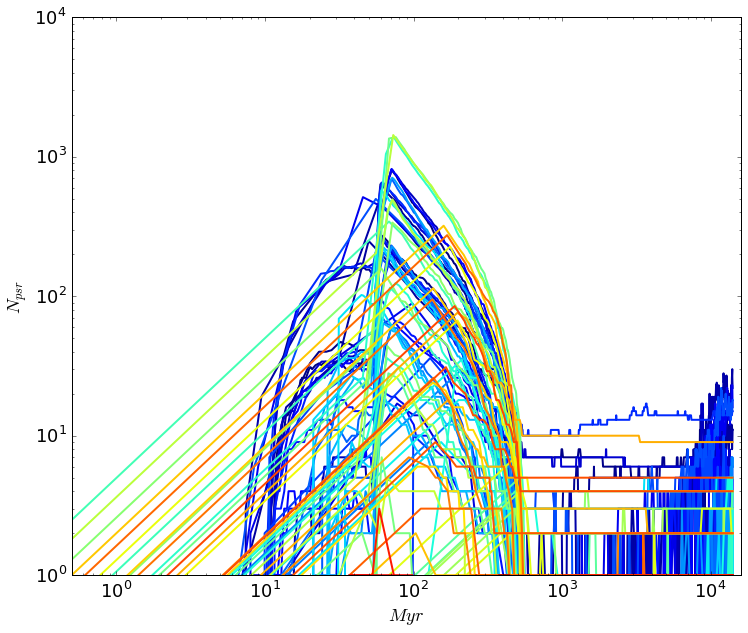

In [42]:
##Cumulative distribution of Npsr vs. time
paths=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/path_nondissolved_newruns.dat', dtype=str)
#print paths

matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 10]
c = cm.jet(np.linspace(0, 1, 110))

plt.figure()
for i in range(len(paths)):
    filestr=paths[i]+'initial'
    datans=np.genfromtxt(filestr+'.ns.dat')
    t_conv=ns.conv('t', filestr+'.conv.sh')
    t=np.array(datans[:,0])*t_conv; Npsr=np.array(datans[:,5])
    plt.plot(t, Npsr, color=c[i], lw=2.)

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.5, 16000.)
#plt.ylim(-0.5, 1000.)
plt.xlabel(r'$Myr$')
plt.ylabel(r'$N_{psr}$')